In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [8]:
df = pd.read_csv('customer_data.csv')

In [9]:
# Aggregate data by customer
customer_data = df.groupby('customer_id').agg({
    'quantity': 'sum',
    'total_price': 'sum',
    'order_date': 'count'
}).reset_index()

In [13]:
# Rename columns for clarity
customer_data.rename(columns={
    'quantity': 'total_quantity',
    'total_price': 'total_spent',
    'order_date': 'order_count'
}, inplace=True)

In [14]:
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_quantity', 'total_spent', 'order_count']])

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)

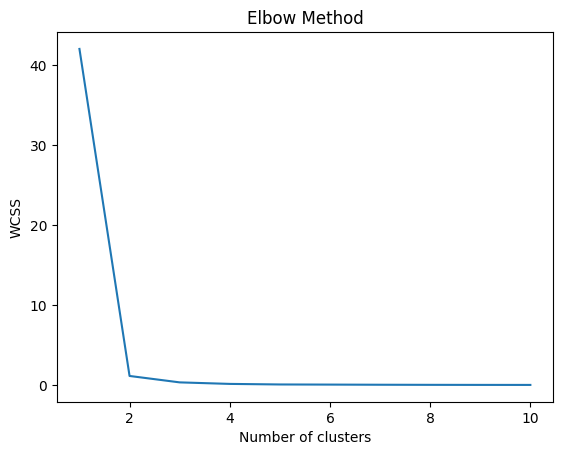

In [16]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data_scaled)

# Group by cluster to see the characteristics of each segment
cluster_analysis = customer_data.groupby('cluster').mean()
print(cluster_analysis)

         customer_id  total_quantity  total_spent  order_count
cluster                                                       
0          13.000000       69.000000  7920.000000    39.000000
1          19.000000        3.666667   596.000000     3.000000
2          16.714286        1.285714   155.285714     1.142857
3          14.666667        6.666667   590.333333     6.333333


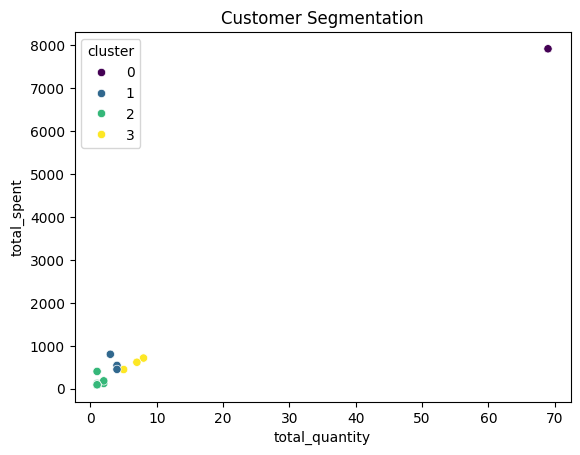

In [18]:
joblib.dump(kmeans, 'customer_segmentation_model.pkl')
joblib.dump(scaler, 'customer_data_scaler.pkl')

# Visualize clusters
sns.scatterplot(x='total_quantity', y='total_spent', hue='cluster', data=customer_data, palette='viridis')
plt.title('Customer Segmentation')
plt.show()